In [84]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [85]:
data= pd.read_csv("breast_cancer1.csv")

In [86]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [87]:
data= data.drop(['Unnamed: 0','id number'], axis=1)

In [88]:
y= data.pop("malignant")

In [89]:
X_train, X_test, y_train, y_test= train_test_split(data, y, test_size=.2, random_state=42)

In [90]:
n_estimators=[100, 200, 300, 400, 500, 600, 700]

In [91]:
max_features= ['auto', 'sqrt','log2']
min_samples_split=[1,2,3,5]
rfc= RandomForestClassifier(n_jobs=1)
estimator= GridSearchCV(rfc, dict(n_estimators= n_estimators, 
                                  max_features=max_features,
                                 min_samples_split=min_samples_split), cv=None, n_jobs=-1)

In [92]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [93]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
best_rfc=estimator.best_estimator_

In [95]:
#Accuracy_Score
accuracy= accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy :", accuracy

Accuracy : 0.964285714286


In [96]:
y_hat= best_rfc.predict(X_test)

In [97]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [98]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, dtype: int64

In [99]:
correct=0
total= y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val== truth_val:
        correct +=1
print correct / float(total)

0.964285714286


In [100]:
#Precision and Recall
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



The model will correctly predict 96% of winners.

In [101]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[93  2]
 [ 3 42]]


Precision: 43/43+2=.96
Recall: 43/43+2= .96

In [102]:
#AUC

In [103]:
roc=roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC score: ", roc

AUC score:  0.995321637427


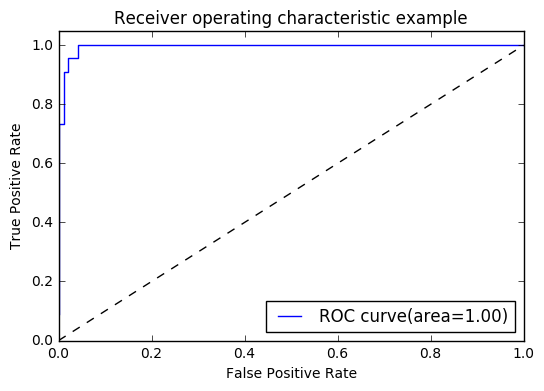

In [107]:
fpr, tpr, thresholds= roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
#plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(area=%0.2f)' % roc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [108]:
#K-fold cross validation
from sklearn import cross_validation
scores= cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [109]:
scores

array([ 0.91549296,  0.98571429,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  1.        ])

In [110]:
mean_score=scores.mean()
std_dev= scores.std()
std_error= scores.std()/math.sqrt(scores.shape[0])
ci= 2.262*std_error
lower_bound= mean_score - ci
upper_bound= mean_score + ci

print "Score is %f +/- %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between  %f and %f' %(lower_bound, upper_bound)

Score is 0.970100 +/- 0.020492
95 percent probability that if this experiment were repeated over and over the average score would be between  0.949608 and 0.990592


AUC score: 0.995321637427 
K-cross Validation: 0.970100 +/- 0.020492 is more accurate prediction of the model